# Tensorflow Basic

Tensorflow is open-source machine learning library to study deep neural network (DNN) developed by Google Brain, it has taken 1st places in many ML library benchmarks with many researchers uses.

It can be installed via `pip install tensorflow` in terminal window 

https://www.tensorflow.org/install


In [2]:
# Checking version
import tensorflow as tf
print(tf.__version__)

2.5.0


## Tensor

All data used in Tensorflow is structured via `tensor` structor.

A tensor is a vector or matrix of n-dimensions that represents all types of data. All values in a tensor hold identical data type with a known (or partially known) shape. The shape of the data is the dimensionality of the matrix or array.

Each tensor has rank (dimension), shape, data type, rank can be dynamic.

| Rank | Numerical entity | Examples |
| :- | -: | :-: |
| 0 | Scalar | s = 123
| 1 | Vector | v = [1.1, 2.2, 3.3]
| 2 | Matrix | m = [[1, 2, 3], [4, 5, 6]]
| 3 | 3-tensor | t = [[[1], [2], [3]], [[4], [5], [6]]]
| n | n-tensor | ...

## Solving simple linear regression using Tensorflow

We can try basic linear regression problem using Tensorflow

### Linear model

When you have `y = ax + b` and given values of `x, y` as below, it's not hard to assume `a` and `b`. `a` = 1, `b` = 1.

|   |   |   |   |   |
| : | : | : | : | : |
| x | 1 | 2 | 3 | 4 | 
| y | 2 | 3 | 4 | 5 |

Solving linear regression with machine learning means finding `a` and `b` from `y = ax + b`. In machine learning we often use `h(x) = wx + b`, not so much different, just finding `w (weight)` and `b (bias)`.
Machine using given data and with hypothesis h(x) finding optimal w and b is called learning, if w and b values are found, with any random value x can be used to inference value y.



step |   w|   b| cost
-----|----|----|-----
   1| 0.78| 0.72| 1.62


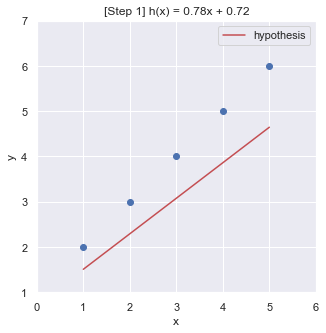

   3| 0.90| 0.76| 0.55


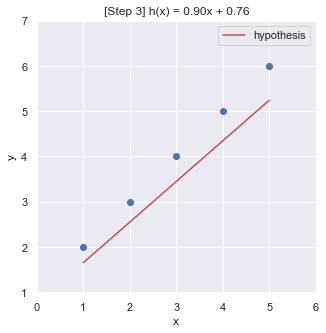

   5| 0.96| 0.78| 0.19


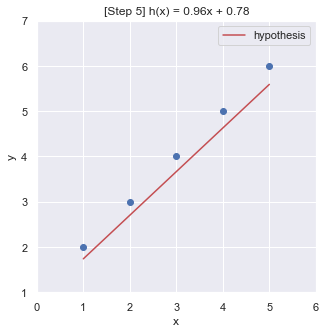

  10| 1.03| 0.80| 0.02


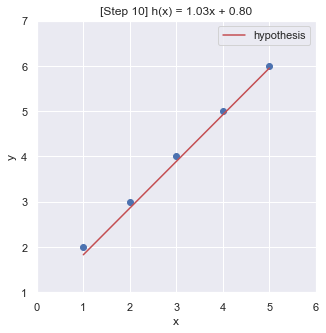

 100| 1.04| 0.86| 0.00


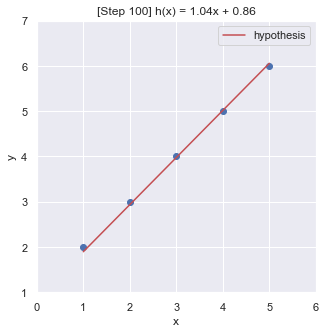

1000| 1.00| 0.99| 0.00


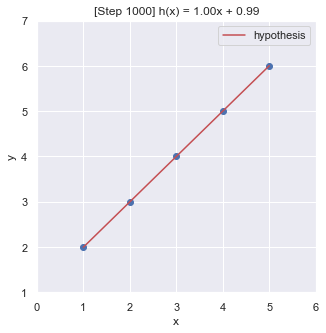

1100| 1.00| 1.00| 0.00


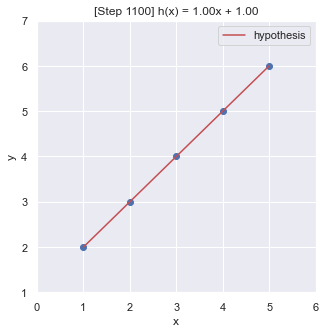

In [62]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf
import seaborn as sns
sns.set()

x = [1, 2, 3, 4, 5]
y = [2, 3, 4, 5, 6]

w = tf.Variable(0.7) # we set weight to 0.7, smaller difference between initial value to actual weight is faster
b = tf.Variable(0.7) # same for bias
lr = 0.01 # learning rate to 0.01, if lr is too big you may end up overshooting, too small it will take forever.
steps = [1, 3, 5, 10, 100, 1000, 1100]
print(f'step |   w|   b| cost')
print(f'-----|----|----|-----')

for i in range(1, 1101):
    with tf.GradientTape() as tape: #recording calculation steps to tape, with tape.gradient() we can get derivative
        y_pred = w * x + b # we set hypothesis as it is
        cost = tf.losses.mean_squared_error(y, y_pred) # set cost with mean squared error
        dw, db = tape.gradient(cost, [w, b])

        w.assign_sub(lr * dw)
        b.assign_sub(lr * db)
 
        if i in steps:
            print(f'{i:4d}| {w.numpy():.2f}| {b.numpy():.2f}| {cost:.2f}')
            plt.figure(figsize=(5,5))
            plt.title(f'[Step {i:d}] h(x) = { w.numpy():.2f}x + ' f'{b.numpy():.2f}')
            plt.plot(x, y, 'o')
            plt.plot(x, w * x + b, 'r', label='hypothesis')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.xlim(0,6)
            plt.ylim(1,7)
            plt.legend(loc='best')
            plt.show()